<a href="https://colab.research.google.com/github/PoliNemkova/conflict_prediction_2025/blob/main/%5B2%5D_Conflict_Prediction_LLM_for_Sudan_feature_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/grive/')

Mounted at /content/grive/


### Acled data

In [ ]:
# loading ACLED
acled = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/acled_bin_all_countries_since_2015.csv')

acled.head(10)

,Country_Name_Short,sum(ACLED_Fatalities),STARTDATE,ENDDATE,abs_change,pct_increase,bin_esc_30
0,Afghanistan,271,2020-01-13,2020-01-20,-1478.0,-8.450543e+01,0
1,Afghanistan,796,2020-09-14,2020-09-21,525.0,1.937269e+02,1
2,Afghanistan,17,2022-12-12,2022-12-19,-779.0,-9.786432e+01,0
3,Afghanistan,17,2023-04-17,2023-04-24,0.0,0.000000e+00,0
4,Afghanistan,14,2023-05-15,2023-05-22,-3.0,-1.764706e+01,0
5,Albania,0,2021-06-14,2021-06-21,0.0,0.000000e+00,0
6,Albania,0,2019-01-07,2019-01-14,0.0,0.000000e+00,0
7,Albania,0,2020-08-31,2020-09-07,0.0,0.000000e+00,0
8,Algeria,0,2018-09-24,2018-10-01,0.0,0.000000e+00,0
9,Algeria,1,2020-05-18,2020-05-25,1.0,1.000000e+12,1


In [ ]:
acled_sudan = acled[(acled['Country_Name_Short'] == 'Sudan') &
                    (acled['STARTDATE'] <= '2023-12-31') &
                    (acled['STARTDATE'] >= '2023-01-01')]

len(acled_sudan)

52

In [ ]:
acled_sudan['sum(ACLED_Fatalities)'].describe()

,sum(ACLED_Fatalities)
count,52.000000
mean,306.365385
std,339.166859
min,4.000000
25%,34.250000
50%,229.500000
75%,383.750000
max,1669.000000


In [ ]:
# applying transformation for normalizing the fatalities
import numpy as np
acled_sudan['log_fatalities'] = np.log(acled_sudan['sum(ACLED_Fatalities)'] + 1)

<ipython-input-5-029704a49aff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_sudan['log_fatalities'] = np.log(acled_sudan['sum(ACLED_Fatalities)'] + 1)


In [ ]:
acled_sudan.sort_values(by='STARTDATE', inplace=True)

<ipython-input-6-31b055096895>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_sudan.sort_values(by='STARTDATE', inplace=True)


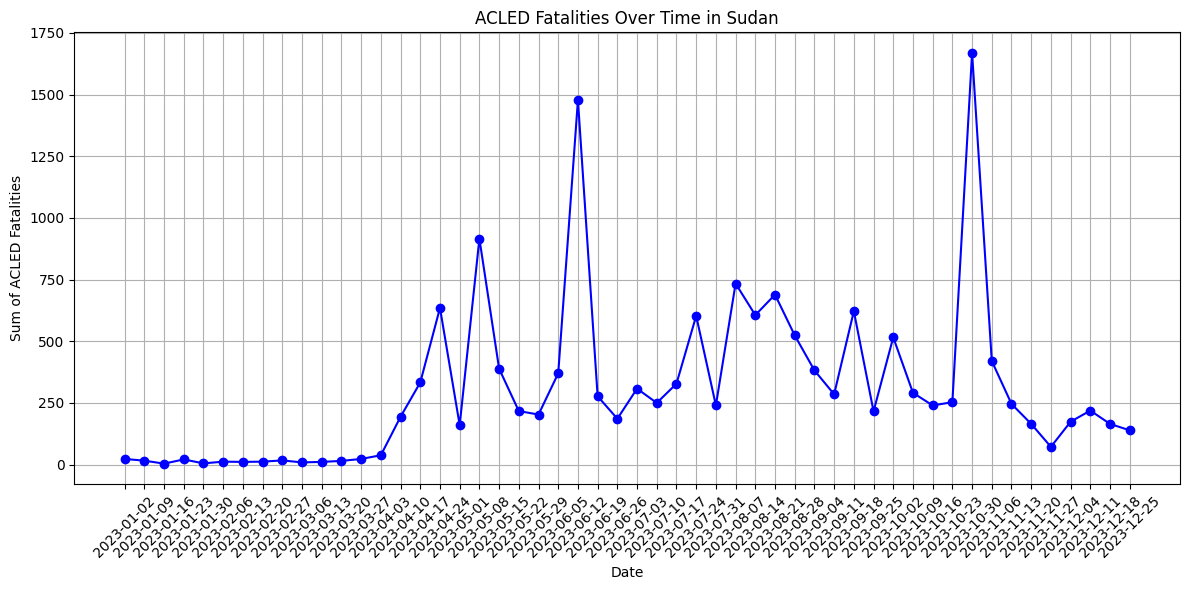

In [ ]:
# Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Sample data with your specified columns
data = {
    'STARTDATE': acled_sudan['STARTDATE'].to_list() ,
    'sum(ACLED_Fatalities)': acled_sudan['sum(ACLED_Fatalities)'].to_list()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['sum(ACLED_Fatalities)'], marker='o', linestyle='-', color='b')
plt.title('ACLED Fatalities Over Time in Sudan')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


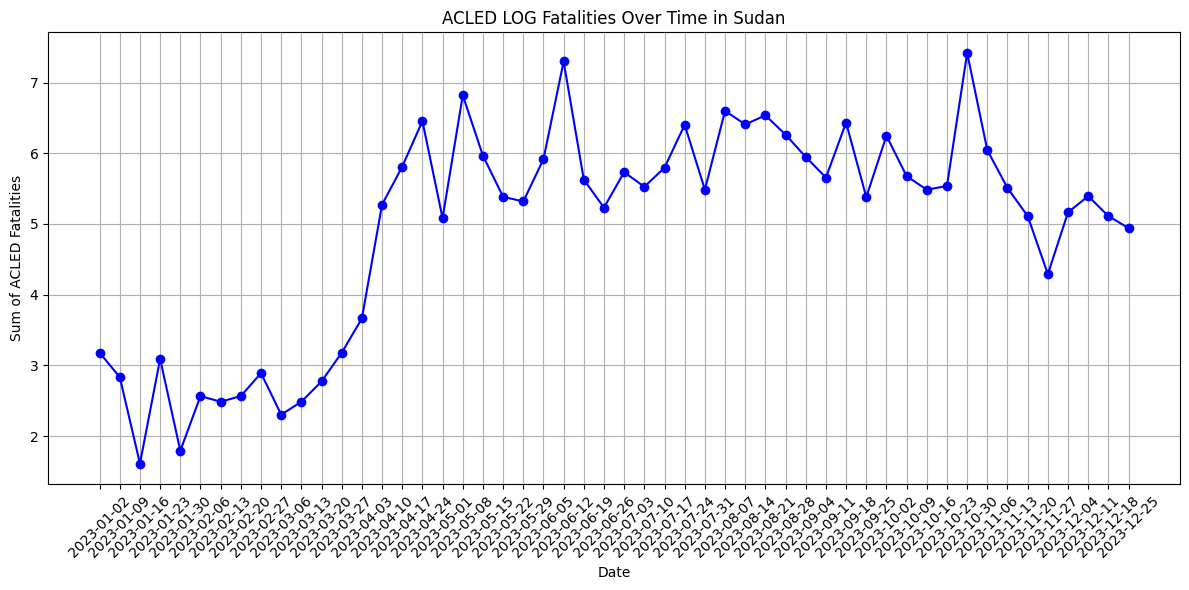

In [ ]:
# Importing the required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Sample data with your specified columns
data = {
    'STARTDATE': acled_sudan['STARTDATE'].to_list() ,
    'log_fatalities': acled_sudan['log_fatalities'].to_list()
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['log_fatalities'], marker='o', linestyle='-', color='b')
plt.title('ACLED LOG Fatalities Over Time in Sudan')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Adjusting ACLED to be biweekly

starts, ends, fatalities = [], [], []

for i in range(0, len(acled_sudan) - 1, 2):
    starts.append(acled_sudan['STARTDATE'].iloc[i])
    ends.append(acled_sudan['ENDDATE'].iloc[i + 1])
    fatalities.append(
        acled_sudan['sum(ACLED_Fatalities)'].iloc[i] + acled_sudan['sum(ACLED_Fatalities)'].iloc[i + 1]
    )

acled_sudan_biweekly = pd.DataFrame({
    'STARTDATE': starts,
    'ENDDATE': ends,
    'sum(ACLED_Fatalities)': fatalities
})

acled_sudan_biweekly.head(10)

,STARTDATE,ENDDATE,sum(ACLED_Fatalities)
0,2023-01-02,2023-01-16,39
1,2023-01-16,2023-01-30,25
2,2023-01-30,2023-02-13,17
3,2023-02-13,2023-02-27,23
4,2023-02-27,2023-03-13,26
5,2023-03-13,2023-03-27,26
6,2023-03-27,2023-04-10,61
7,2023-04-10,2023-04-24,527
8,2023-04-24,2023-05-08,795
9,2023-05-08,2023-05-22,1305


In [ ]:
len(acled_sudan_biweekly)

26

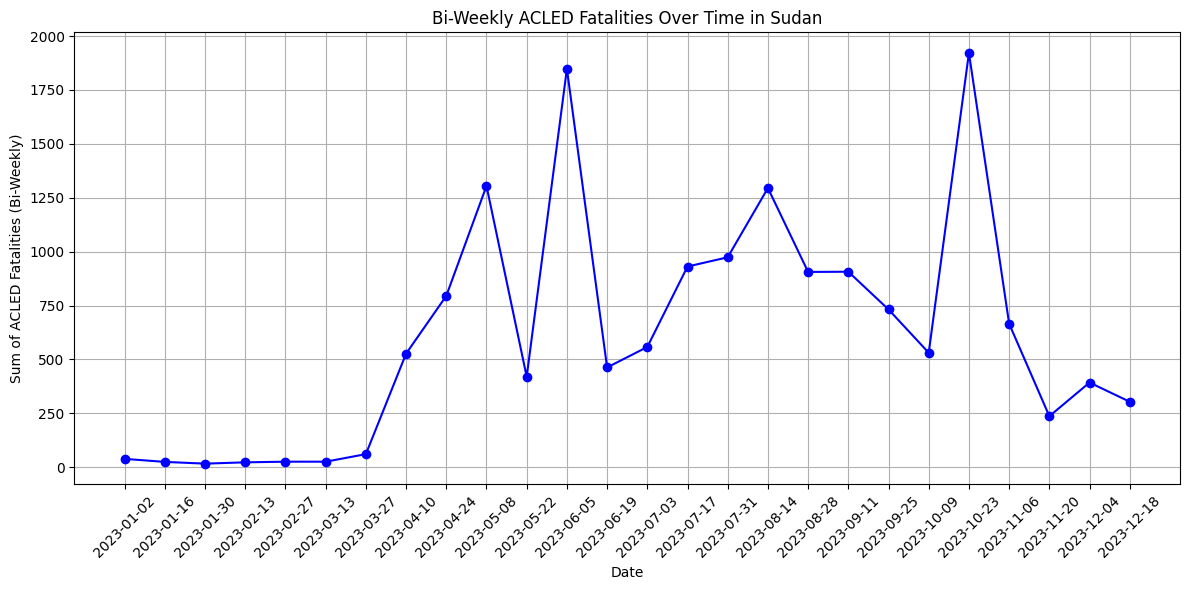

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = acled_sudan_biweekly
# Plotting the bi-weekly aggregated data
plt.figure(figsize=(12, 6))
plt.plot(df['STARTDATE'], df['sum(ACLED_Fatalities)'], marker='o', linestyle='-', color='b')
plt.title('Bi-Weekly ACLED Fatalities Over Time in Sudan')
plt.xlabel('Date')
plt.ylabel('Sum of ACLED Fatalities (Bi-Weekly)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
# Defining positive examples

fatalities_std = np.std(acled_sudan_biweekly['sum(ACLED_Fatalities)'])

# Define conditions with safe handling for division by zero
conditions = [

    # option 2 - dramatic increase in fatalities by 100%
    ((acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1) != 0) &
     (((acled_sudan_biweekly['sum(ACLED_Fatalities)'] / acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1))) > 2)),

    # option 3 - extreme/outlier - value change over one std
    ((acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1) - acled_sudan_biweekly['sum(ACLED_Fatalities)']) > fatalities_std),

    # option 1 - increase is over 50% or more than 50 victims
    #(acled_sudan_biweekly['sum(ACLED_Fatalities)'] > 50), #|
    #((acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1) != 0) &
    # ((1 - (acled_sudan_biweekly['sum(ACLED_Fatalities)'] / acled_sudan_biweekly['sum(ACLED_Fatalities)'].shift(1))) > 0.5)),
]

# Define corresponding values
choices = [2, 3]

# Apply np.select() to assign values based on conditions
acled_sudan_biweekly['importance'] = np.select(conditions, choices, default=0)

acled_sudan_biweekly['importance'] = acled_sudan_biweekly['importance'].apply(lambda x: 1 if x > 0 else 0)

acled_sudan_biweekly

,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance
0,2023-01-02,2023-01-16,39,0
1,2023-01-16,2023-01-30,25,0
2,2023-01-30,2023-02-13,17,0
3,2023-02-13,2023-02-27,23,0
4,2023-02-27,2023-03-13,26,0
5,2023-03-13,2023-03-27,26,0
6,2023-03-27,2023-04-10,61,1
7,2023-04-10,2023-04-24,527,1
8,2023-04-24,2023-05-08,795,0
9,2023-05-08,2023-05-22,1305,0


In [ ]:
# adding timespots for simplicity

acled_sudan_biweekly['backlogged_importance'] = acled_sudan_biweekly['importance'].shift(-1).fillna(0).astype(int)
acled_sudan_biweekly['timeslot'] = range(0, len(acled_sudan_biweekly))
acled_sudan_biweekly

,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance,backlogged_importance,timeslot
0,2023-01-02,2023-01-16,39,0,0,0
1,2023-01-16,2023-01-30,25,0,0,1
2,2023-01-30,2023-02-13,17,0,0,2
3,2023-02-13,2023-02-27,23,0,0,3
4,2023-02-27,2023-03-13,26,0,0,4
5,2023-03-13,2023-03-27,26,0,1,5
6,2023-03-27,2023-04-10,61,1,1,6
7,2023-04-10,2023-04-24,527,1,0,7
8,2023-04-24,2023-05-08,795,0,0,8
9,2023-05-08,2023-05-22,1305,0,1,9


### Texts and events data

In [ ]:
sudan_2023 = pd.read_csv('/content/grive/MyDrive/Colab Notebooks/sudan_2023_events+text+enc.csv')

In [ ]:
sudan_2023.columns

Index(['Unnamed: 0', 'globaleventid', 'sqldate', 'monthyear', 'year',
       'fractiondate', 'actor1code', 'actor1name', 'actor1countrycode',
       'actor1knowngroupcode', 'actor1ethniccode', 'actor1religion1code',
       'actor1religion2code', 'actor1type1code', 'actor1type2code',
       'actor1type3code', 'actor2code', 'actor2name', 'actor2countrycode',
       'actor2knowngroupcode', 'actor2ethniccode', 'actor2religion1code',
       'actor2religion2code', 'actor2type1code', 'actor2type2code',
       'actor2type3code', 'isrootevent', 'eventcode', 'cameocodedescription',
       'eventbasecode', 'eventrootcode', 'quadclass', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone', 'actor1geotype',
       'actor1geofullname', 'actor1geocountrycode', 'actor1geoadm1code',
       'actor1geoadm2code', 'actor1geolat', 'actor1geolong',
       'actor1geofeatureid', 'actor2geotype', 'actor2geofullname',
       'actor2geocountrycode', 'actor2geoadm1code', 'actor2geoadm2cod

In [ ]:
sudan_2023.head()

,Unnamed: 0,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,...,actiongeoadm1code,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,embeddings
0,8,1078772253,2023-01-04,202301,2023,2023.0110,USAGOV,US OFFICIAL,USA,NaN,...,SU,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...
1,7,1078771985,2023-01-04,202301,2023,2023.0110,SDN,SUDANESE,SDN,NaN,...,SU,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...
2,19,1080099234,2023-01-13,202301,2023,2023.0356,SDN,SUDAN,SDN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...
3,20,1080099446,2023-01-13,202301,2023,2023.0356,hau,HAUSA,NaN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...
4,21,1080099238,2023-01-13,202301,2023,2023.0356,SDNGOV,SUDANESE,SDN,NaN,...,SU42,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...


In [ ]:
# Matching timeslots to data in GDELT Sudan


acled_sudan_biweekly['STARTDATE'] = pd.to_datetime(acled_sudan_biweekly['STARTDATE'], errors='coerce')
acled_sudan_biweekly['ENDDATE'] = pd.to_datetime(acled_sudan_biweekly['ENDDATE'], errors='coerce')

# Create an IntervalIndex from the first table
timeslot_intervals = pd.IntervalIndex.from_arrays(
    acled_sudan_biweekly['STARTDATE'],
    acled_sudan_biweekly['ENDDATE'],
    closed='both'
)

# Assign the timeslot based on which interval each date falls into
sudan_2023['timeslot'] = sudan_2023['sqldate'].apply(
    lambda x: acled_sudan_biweekly.loc[timeslot_intervals.contains(x), 'timeslot'].iloc[0] if any(timeslot_intervals.contains(x)) else None
)

# fix the last timeslot that didn't have shifting reference

sudan_2023['timeslot'].fillna(26, inplace=True)
sudan_2023['timeslot'] = sudan_2023['timeslot'].astype(int)

sudan_2023.head(5)


<ipython-input-13-ef4a2a6a8477>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sudan_2023['timeslot'].fillna(26, inplace=True)


,Unnamed: 0,globaleventid,sqldate,monthyear,year,fractiondate,actor1code,actor1name,actor1countrycode,actor1knowngroupcode,...,actiongeoadm2code,actiongeolat,actiongeolong,actiongeofeatureid,dateadded,sourceurl,geometry,text,embeddings,timeslot
0,8,1078772253,2023-01-04,202301,2023,2023.0110,USAGOV,US OFFICIAL,USA,NaN,...,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0
1,7,1078771985,2023-01-04,202301,2023,2023.0110,SDN,SUDANESE,SDN,NaN,...,NaN,16.00,30.0,SU,20230104234500,https://africanminingmarket.com/sudan-record-g...,POINT (30 16),Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0
2,19,1080099234,2023-01-13,202301,2023,2023.0356,SDN,SUDAN,SDN,NaN,...,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0
3,20,1080099446,2023-01-13,202301,2023,2023.0356,hau,HAUSA,NaN,NaN,...,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0
4,21,1080099238,2023-01-13,202301,2023,2023.0356,SDNGOV,SUDANESE,SDN,NaN,...,37041,11.15,34.1,315383,20230113234500,https://www.globalr2p.org/publications/atrocit...,POINT (34.1 11.15),Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0


In [ ]:
sudan_2023['timeslot'].nunique()

25

In [ ]:
sudan_2023.iloc[450]

,450
Unnamed: 0,548
globaleventid,1099470243
sqldate,2023-05-01
monthyear,202305
year,2023
...,...
sourceurl,https://www.thisdaylive.com/index.php/2023/05/...
geometry,POINT (34.1 11.15)
text,BY REUBEN ABATI\n\nabati1990@gmail.com\n\nSuda...
embeddings,[-3.57874155e-01 2.75850028e-01 -2.23950744e-...


In [ ]:
# dropping bunch of columns from GDELT that are currently not used

sudan_light = sudan_2023[['globaleventid', 'sqldate', 'goldsteinscale',
       'nummentions', 'numsources', 'numarticles', 'avgtone',  'text',
       'embeddings', 'timeslot']]

In [ ]:
# adding importance (positivity sign) to the GDELT set

sudan_light = pd.merge(sudan_light, acled_sudan_biweekly[['timeslot', 'backlogged_importance']], on='timeslot', how='left')
sudan_light

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance
0,1078772253,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0
1,1078771985,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0
2,1080099234,2023-01-13,-10.0,4,1,4,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0
3,1080099446,2023-01-13,-10.0,10,1,10,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0
4,1080099238,2023-01-13,-0.3,6,1,6,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1293,1153385489,2024-01-23,-10.0,6,1,6,-8.040201,Sudanese authorities should investigate report...,[-8.29017162e-02 1.59730658e-01 -8.07869434e-...,26,NaN
1294,1153385490,2024-01-23,-2.0,3,1,3,-8.040201,Sudanese authorities should investigate report...,[-8.29017162e-02 1.59730658e-01 -8.07869434e-...,26,NaN
1295,1153385487,2024-01-23,-10.0,2,1,2,-8.040201,Sudanese authorities should investigate report...,[-8.29017162e-02 1.59730658e-01 -8.07869434e-...,26,NaN
1296,1153385491,2024-01-23,-10.0,3,1,3,-8.040201,Sudanese authorities should investigate report...,[-8.29017162e-02 1.59730658e-01 -8.07869434e-...,26,NaN


In [ ]:
l = sudan_light[sudan_light['sqldate'].isin(['2023-04-15','2023-04-16', '2023-04-17'])]

In [ ]:
for i, row in l.iterrows():
  print(row['sqldate'], row['text'])
  print('++++++++')

2023-04-15 Fierce fighting raged in Sudan's capital despite a pause Sunday to help those caught up in the violence, on the second day of battles that left three UN staff among more than 50 civilians killed nationwide.

Doctors say hundreds are injured, while the World Health Organization warned "several of the nine hospitals in Khartoum receiving injured civilians have run out of blood, transfusion equipment, intravenous fluids and other vital supplies".

The World Food Programme said it was suspending operations in the impoverished country after the killing of its three workers.

The battles between the powerful armed forces and the Rapid Support Forces (RSF) sparked an international outcry and regional concern, including border closures by neighbours Egypt and Chad.

Deafening explosions and intense gunfire rattled buildings in the capital Khartoum's densely populated northern and southern suburbs as tanks rumbled on the streets and fighter jets roared overhead, witnesses said.

Figh

In [ ]:
# working with positive examples

positive_articles = sudan_light[sudan_light['backlogged_importance'] == 1]
negative_articles = sudan_light[sudan_light['backlogged_importance'] == 0]

len(positive_articles), len(negative_articles)

(338, 876)

In [ ]:
positive_articles['text'].nunique()

64

In [ ]:
negative_articles['text'].nunique()

172

In [ ]:
rng = ['2023-03-11', '2023-04-11', '2023-04-13', '2023-04-15',
       '2023-04-16', '2023-04-17', '2023-04-18', '2023-04-19',
       '2023-04-20', '2023-04-21', '2023-04-23', '2023-04-24']
rng1 = ['2023-04-15','2023-04-16', '2023-04-17']

In [ ]:
p = positive_articles[positive_articles['sqldate'].isin(rng)]

In [ ]:
n = negative_articles[negative_articles['sqldate'].isin(rng1)]

In [ ]:
p['sqldate'].unique()

array([], dtype=object)

In [ ]:
row

,1099
globaleventid,1138308855
sqldate,2023-11-05
goldsteinscale,-10.0
nummentions,8
numsources,1
numarticles,8
avgtone,-7.624633
text,RAMALLAH -- U.S. Secretary of State Antony Bli...
embeddings,[-1.64687261e-01 3.53060782e-01 -2.02570632e-...
timeslot,21


In [ ]:
for i, row in n.iterrows():
  print(row['sqldate'], row['text'])
  print('++++++')

2023-04-15 Fierce fighting raged in Sudan's capital despite a pause Sunday to help those caught up in the violence, on the second day of battles that left three UN staff among more than 50 civilians killed nationwide.

Doctors say hundreds are injured, while the World Health Organization warned "several of the nine hospitals in Khartoum receiving injured civilians have run out of blood, transfusion equipment, intravenous fluids and other vital supplies".

The World Food Programme said it was suspending operations in the impoverished country after the killing of its three workers.

The battles between the powerful armed forces and the Rapid Support Forces (RSF) sparked an international outcry and regional concern, including border closures by neighbours Egypt and Chad.

Deafening explosions and intense gunfire rattled buildings in the capital Khartoum's densely populated northern and southern suburbs as tanks rumbled on the streets and fighter jets roared overhead, witnesses said.

Figh

##### Cosine Similarity with Positive and Negative average embedding

In [ ]:
# getting mean positive embedding

arrays = []
for item in positive_articles['embeddings']:
  string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  final = [float(number) for number in string_list]
  arrays.append(final)

array = np.array(arrays)
mean_positive_embedding = array.mean(axis=0)
len(mean_positive_embedding)

768

In [ ]:
# getting mean negative embedding

arrays = []
for item in negative_articles['embeddings']:
  string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  final = [float(number) for number in string_list]
  arrays.append(final)

array = np.array(arrays)
mean_negative_embedding = array.mean(axis=0)
len(mean_negative_embedding)

768

In [ ]:
# calculate cosign similarity with negative and positive embeddings across the GDELT set

from sklearn.metrics.pairwise import cosine_similarity

cos_sim_pos = []
cos_sim_neg = []

for i in range(len(sudan_light)):
  string_list = sudan_light['embeddings'].iloc[i].replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
  numeric_embedding = [float(number) for number in string_list]
  similarity_positive = cosine_similarity(np.array(numeric_embedding).reshape(1, -1), np.array(mean_positive_embedding).reshape(1, -1))
  cos_sim_pos.append(similarity_positive[0][0])
  similarity_negative = cosine_similarity(np.array(numeric_embedding).reshape(1, -1), np.array(mean_negative_embedding).reshape(1, -1))
  cos_sim_neg.append(similarity_negative[0][0])

sudan_light['cosine_similarity_positive'] = cos_sim_pos
sudan_light['cosine_similarity_negative'] = cos_sim_neg

In [ ]:
sudan_light.head(5)

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative
0,1078772253,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0,0.872888,0.874157
1,1078771985,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0,0.872888,0.874157
2,1080099234,2023-01-13,-10.0,4,1,4,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359
3,1080099446,2023-01-13,-10.0,10,1,10,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359
4,1080099238,2023-01-13,-0.3,6,1,6,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359


##### Topic Modeling

In [ ]:
# adding topic modeling

!pip install pandas numpy gensim scikit-learn nltk

import pandas as pd
import numpy as np
import nltk
import gensim
from gensim import corpora
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK data (only the first time)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load your dataset (replace this with your actual dataset)
articles = sudan_light['text']

# Define custom stop words
stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)

# Preprocess the text
def preprocess_text(text):
    # Tokenize, remove punctuation, stop words, and convert to lowercase
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

articles['tokens'] = articles.apply(preprocess_text)


# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(articles['tokens'])

# Filter out words that occur too frequently or too rarely
dictionary.filter_extremes(no_below=2, no_above=0.5)

# Create the bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in articles['tokens']]


from gensim.models import LdaModel

# Train the LDA model
num_topics = 20  # Adjust the number of topics as needed
lda_model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

# Display the topics found by the model
topics = lda_model.print_topics(num_words=3)
for topic in topics:
    print(topic)

# Function to get top N topics for a document
def get_top_topics(lda_model, corpus, n=3):
    top_topics = []
    for bow in corpus:
        topic_probs = lda_model.get_document_topics(bow)
        # Sort topics by their probability in descending order
        top_n = sorted(topic_probs, key=lambda x: x[1], reverse=True)[:n]
        top_topics.append([topic_id for topic_id, prob in top_n])
    return top_topics

# Assign top 3 topics to each article
articles['top_topics'] = get_top_topics(lda_model, corpus, n=3)

articles.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-111-8ea224fe8e5c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles['tokens'] = articles.apply(preprocess_text)


(0, '0.009*"british" + 0.008*"parliament" + 0.008*"uk"')
(1, '0.012*"women" + 0.010*"resistance" + 0.007*"war"')
(2, '0.017*"south" + 0.016*"israel" + 0.009*"elections"')
(3, '0.010*"port" + 0.009*"citizens" + 0.008*"cnn"')
(4, '0.023*"peace" + 0.014*"israel" + 0.010*"agreement"')
(5, '0.031*"indian" + 0.020*"operation" + 0.015*"nationals"')
(6, '0.018*"rsf" + 0.011*"war" + 0.011*"statement"')
(7, '0.015*"rsf" + 0.009*"united" + 0.008*"humanitarian"')
(8, '0.014*"south" + 0.011*"akol" + 0.008*"president"')
(9, '0.011*"hemedti" + 0.007*"million" + 0.006*"international"')
(10, '0.014*"president" + 0.010*"biden" + 0.008*"africa"')
(11, '0.019*"biden" + 0.017*"iran" + 0.009*"rsf"')
(12, '0.014*"rsf" + 0.011*"army" + 0.007*"killed"')
(13, '0.011*"children" + 0.007*"international" + 0.007*"court"')
(14, '0.010*"ministers" + 0.007*"international" + 0.007*"state"')
(15, '0.018*"nigerians" + 0.014*"nigeria" + 0.011*"africa"')
(16, '0.013*"culture" + 0.011*"darfur" + 0.009*"crimes"')
(17, '0.023

,text
0,Sudan’s mineral resources company has announce...
1,Sudan’s mineral resources company has announce...
2,Atrocity Alert is a weekly publication by the ...
3,Atrocity Alert is a weekly publication by the ...
4,Atrocity Alert is a weekly publication by the ...


In [ ]:
topics[0][1]

'0.009*"british" + 0.008*"parliament" + 0.008*"uk" + 0.008*"ceasefire" + 0.007*"minister"'

In [ ]:
topics[0]

(0,
 '0.009*"british" + 0.008*"parliament" + 0.008*"uk" + 0.008*"ceasefire" + 0.007*"minister"')

In [ ]:
# Adding topic number and verbose to the GDELT set

topic_numbers = []
topics_verbose = []
for item in articles['top_topics']:
  top_topic_number = item[0]
  topic_verbose = topics[top_topic_number][1]
  #print(top_topic_number,' and verbose: ', topic_verbose )
  topic_numbers.append(top_topic_number)
  topics_verbose.append(topic_verbose)

sudan_light['topic_number'] = topic_numbers
sudan_light['topic_verbose'] = topics_verbose

sudan_light.head()

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative,topic_number,topic_verbose,sentiment_score,summary
0,1078772253,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0,0.872888,0.874157,18,"0.011*""african"" + 0.009*""central"" + 0.009*""sec...",-0.9265,Sudan is one of the world's largest gold produ...
1,1078771985,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0,0.872888,0.874157,18,"0.011*""african"" + 0.009*""central"" + 0.009*""sec...",-0.9265,Sudan is one of the world's largest gold produ...
2,1080099234,2023-01-13,-10.0,4,1,4,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...
3,1080099446,2023-01-13,-10.0,10,1,10,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...
4,1080099238,2023-01-13,-0.3,6,1,6,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...


##### Sentiment score

In [ ]:
# adding sentiment score

!pip install nltk
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Sample DataFrame (replace this with your actual dataset)
articles = sudan_light['text']

# Function to calculate sentiment score
def get_sentiment_score(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Add a new column for sentiment score
sentiment_scores = articles.apply(get_sentiment_score)
sudan_light['sentiment_score'] = sentiment_scores
sentiment_scores

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,text
0,-0.9265
1,-0.9265
2,-0.9996
3,-0.9996
4,-0.9996
...,...
1293,-0.9988
1294,-0.9988
1295,-0.9988
1296,-0.9988


In [ ]:
sentiment_scores.describe()

,text
count,1298.000000
mean,-0.239076
std,0.867715
min,-0.999800
25%,-0.995550
50%,-0.915400
75%,0.889100
max,0.999800


In [ ]:
sudan_light.head(5)

,globaleventid,sqldate,goldsteinscale,nummentions,numsources,numarticles,avgtone,text,embeddings,timeslot,backlogged_importance,cosine_similarity_positive,cosine_similarity_negative,topic_number,topic_verbose,sentiment_score,summary
0,1078772253,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0,0.872888,0.874157,18,"0.011*""african"" + 0.009*""central"" + 0.009*""sec...",-0.9265,Sudan is one of the world's largest gold produ...
1,1078771985,2023-01-04,3.0,10,1,10,-0.711744,Sudan’s mineral resources company has announce...,[-7.32843429e-02 4.68192399e-01 -5.93543611e-...,0,0.0,0.872888,0.874157,18,"0.011*""african"" + 0.009*""central"" + 0.009*""sec...",-0.9265,Sudan is one of the world's largest gold produ...
2,1080099234,2023-01-13,-10.0,4,1,4,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...
3,1080099446,2023-01-13,-10.0,10,1,10,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...
4,1080099238,2023-01-13,-0.3,6,1,6,-9.887006,Atrocity Alert is a weekly publication by the ...,[ 1.97458729e-01 1.11845203e-01 -1.90304264e-...,0,0.0,0.868861,0.869359,17,"0.023*""violence"" + 0.014*""military"" + 0.009*""s...",-0.9996,On 23 October Myanmar’s (Burma) military – the...


In [ ]:
sudan_light['topic_verbose'].iloc[1]

'0.011*"african" + 0.009*"central" + 0.009*"security"'

In [ ]:
import pandas as pd

# Sample data
data = sudan_light['topic_verbose']
df = pd.DataFrame(data)

# Function to split the data string into separate columns
def split_data_string(row):
    # Split by ' + ' to get individual components
    components = row.split(' + ')
    # Extract the numeric value and word from each component
    split_components = []
    for component in components:
        value, word = component.split('*')
        # Remove quotes from the word
        word = word.replace('"', '')
        split_components.extend([float(value), word])
    return split_components

# Apply the function and create new columns
sudan_light[['dominance_score_1', 'topic1', 'dominance_score_2', 'topic2', 'dominance_score_3', 'topic3']] = sudan_light['topic_verbose'].apply(split_data_string).apply(pd.Series)
# Display the resulting DataFrame
sudan_light.head()


                                          topic_verbose  dominance_score_1  \
0     0.011*"african" + 0.009*"central" + 0.009*"sec...              0.011   
1     0.011*"african" + 0.009*"central" + 0.009*"sec...              0.011   
2     0.023*"violence" + 0.014*"military" + 0.009*"s...              0.023   
3     0.023*"violence" + 0.014*"military" + 0.009*"s...              0.023   
4     0.023*"violence" + 0.014*"military" + 0.009*"s...              0.023   
...                                                 ...                ...   
1293  0.018*"nigerians" + 0.014*"nigeria" + 0.011*"a...              0.018   
1294  0.018*"nigerians" + 0.014*"nigeria" + 0.011*"a...              0.018   
1295  0.018*"nigerians" + 0.014*"nigeria" + 0.011*"a...              0.018   
1296  0.018*"nigerians" + 0.014*"nigeria" + 0.011*"a...              0.018   
1297  0.018*"nigerians" + 0.014*"nigeria" + 0.011*"a...              0.018   

         topic1  dominance_score_2    topic2  dominance_score_3

In [ ]:
# Most common topics in Sudan GDELT

sudan_light['topic_number'].value_counts().sort_values(ascending=False)

,count
topic_number,
6,127
7,98
8,94
19,90
3,84
18,77
15,73
2,73
14,69


In [ ]:
# since concutination of the full text articles is too long I add summaries (of each article separately)
# THIS CELL TOOK ME ~ 7-8 HOURS TO RUN
'''

import pandas as pd
from transformers import pipeline

# Initialize the summarization pipeline using BART
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

articles = sudan_light['text']

# Function to generate a summary for each article with input length control
def generate_summary(text, max_length=50, min_length=25):
    # Truncate the text to a maximum of 1024 tokens
    if len(text.split()) > 512:  # Adjust this number if needed
        text = ' '.join(text.split()[:512])

    # Generate summary
    try:
        summary = summarizer(text, max_length=max_length, min_length=min_length, do_sample=False)
        return summary[0]['summary_text']
    except Exception as e:
        return f"Error: {e}"

# Apply the summarization function to each article
summaries = articles.apply(generate_summary)

sudan_light['summary'] = summaries['text']

# Display the DataFrame with summaries
summaries
'''

Your max_length is set to 50, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 50, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 50, but your input_length is only 36. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=18)
Your max_length is set to 50, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)
Your max

,text
0,Sudan is one of the world's largest gold produ...
1,Sudan is one of the world's largest gold produ...
2,On 23 October Myanmar’s (Burma) military – the...
3,On 23 October Myanmar’s (Burma) military – the...
4,On 23 October Myanmar’s (Burma) military – the...
...,...
1293,"On October 5 and 6, 2014, government security ..."
1294,"On October 5 and 6, 2014, government security ..."
1295,"On October 5 and 6, 2014, government security ..."
1296,"On October 5 and 6, 2014, government security ..."


In [ ]:
#sudan_light['summary'] = summaries['text']
#summaries.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/summaries.csv')
summaries = pd.read_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/summaries.csv')

In [ ]:
sudan_light['summary'] = summaries['text']

In [ ]:
# comparing the quality of the summaries

print(
    '_________FULL TEXT: ', sudan_light['text'].iloc[756], '\n\n\n',
    '_________SUMMARY: ', summaries['text'].iloc[756])

_________FULL TEXT:  Fighting reportedly has intensified after the Armed Forces withdrew from talks in Jeddah

Political Analysis

An unstable humanitarian ceasefire agreement between the Sudanese Armed Forces (SAF) and the Rapid Support Forces (RSF) expired on June 4 after the collapse of negotiations in the Red Sea Kingdom of Saudi Arabia port city of Jeddah.

The aim of the accord was to allow the evacuation of those seeking medical attention and for the delivery of food and medical supplies.

In the midst of this impasse involving the forces loyal to General Abdel Fattah al-Burhan and his nemesis the militia leader General Mohamed Hamdan Degalo, the African Union (AU) held a meeting on June 1 aimed at restarting its process for stabilizing Sudan. The AU position provides a far more comprehensive roadmap not only to end the current security crisis, but the plan calls for the reimposition of an elected government.

Nevertheless, even during the April-May ceasefire periods, fighting c

In [ ]:
summaries['text'].isna().sum()

0

In [ ]:
summaries['text'].iloc[756]

'Fighting reportedly has intensified after the Armed Forces withdrew from talks in Jeddah. Since April 15 when the fighting erupted, hundreds of people have been reportedly killed with thousands wounded. Approximately 2 million civilians both Sudanese nationals and refugees from neighboring'

In [ ]:
sudan_light.columns

Index(['globaleventid', 'sqldate', 'goldsteinscale', 'nummentions',
       'numsources', 'numarticles', 'avgtone', 'text', 'embeddings',
       'timeslot', 'backlogged_importance', 'cosine_similarity_positive',
       'cosine_similarity_negative', 'topic_number', 'topic_verbose',
       'sentiment_score', 'summary', 'dominance_score_1', 'topic1',
       'dominance_score_2', 'topic2', 'dominance_score_3', 'topic3'],
      dtype='object')

In [ ]:
sudan_light['dominance_score_1'].mean()

0.015141756548536209

In [ ]:
# compiling the set by timeslot

goldsteinscale, events_density, nummentions, numsources, numarticles, avgtone, cosine_similarity_positive, cosine_similarity_negative, strings, topics, sentiments, sentiment_std, avg_embeddings, unique_articles, summaries_all, goldstein_min_maxs, topic_1s, topic_2s, topic_3s, dominance_score_1s, dominance_score_2s, dominance_score_3s  = [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],[], [], [], [], [], [], []
timeslots = sudan_light['timeslot'].unique()

for i in timeslots:

  part = sudan_light[sudan_light['timeslot']==i]

  goldsteinscale_average = part['goldsteinscale'].mean()
  goldstein_min_max = [part['goldsteinscale'].min(), part['goldsteinscale'].max()]
  nummentions_sum = part['nummentions'].sum()
  numsources_sum = part['numsources'].sum()
  numarticles_sum = part['numarticles'].sum()
  avgtone_average = part['avgtone'].mean()
  cosine_similarity_positive_average = part['cosine_similarity_positive'].mean()
  cosine_similarity_negative_average = part['cosine_similarity_negative'].mean()
  event_density = len(part)
  topic = part['topic_number'].mode().iloc[0]
  sentiment = part['sentiment_score'].mean()
  sentiment_std_part = part['sentiment_score'].std()
  # dealing with topcs
  topic_1 = part['topic1'].mode().iloc[0]
  topic_2 = part['topic2'].mode().iloc[0]
  topic_3 = part['topic3'].mode().iloc[0]

  dominance_score_1 = part['dominance_score_1'].mean()
  dominance_score_2 = part['dominance_score_2'].mean()
  dominance_score_3 = part['dominance_score_3'].mean()


  # calc avg emb
  arrays = []
  for item in part['embeddings']:
    string_list = item.replace('[', ' ').replace(']', ' ').replace('\n', ' ').split()
    final = [float(number) for number in string_list]
    arrays.append(final)
  array = np.array(arrays)
  avg_embedding = array.mean(axis=0)

  goldsteinscale.append(goldsteinscale_average)
  goldstein_min_maxs.append(goldstein_min_max)
  nummentions.append(nummentions_sum)
  numsources.append(numsources_sum)
  numarticles.append(numarticles_sum)
  avgtone.append(avgtone_average)
  cosine_similarity_positive.append(cosine_similarity_positive_average)
  cosine_similarity_negative.append(cosine_similarity_negative_average)
  events_density.append(event_density)
  sentiments.append(sentiment)
  sentiment_std.append(sentiment_std_part)
  topics.append(topic)
  avg_embeddings.append(avg_embedding)
  topic_1s.append(topic_1)
  topic_2s.append(topic_2)
  topic_3s.append(topic_3)
  dominance_score_1s.append(dominance_score_1)
  dominance_score_2s.append(dominance_score_2)
  dominance_score_3s.append(dominance_score_3)

  # after here we're using unique articles NLP features
  part = part.drop_duplicates(subset=['text'])
  unique_articles_count = len(part)
  big_string = ''
  for j in range(len(part)):
    big_string = big_string + part['text'].iloc[j] + ' '+ str(part['sqldate'].iloc[j]) +' [SEP]'
  summaries_set = ''
  for j in range(len(part)):
    summaries_set = summaries_set + part['summary'].iloc[j] + ' '+ str(part['sqldate'].iloc[j]) +' [SEP]'

  strings.append(big_string)
  unique_articles.append(unique_articles_count)
  summaries_all.append(summaries_set)


biweekly_Sudan_2023 = pd.DataFrame({
    'timeslot': timeslots,
    'goldsteinscale': goldsteinscale,
    'goldstein_min_max': goldstein_min_maxs,
    'avgtone': avgtone,
    'events_density': events_density,
    'unique_articles': unique_articles,
    'nummentions': nummentions,
    'numsources': numsources,
    'numarticles': numarticles,
    'cosine_similarity_positive': cosine_similarity_positive,
    'cosine_similarity_negative': cosine_similarity_negative,
    'avg_embeddings': avg_embeddings,
    'topic': topics,
    'topic_1': topic_1s,
    'dominance_score_1': dominance_score_1s,
    'topic_2': topic_2s,
    'dominance_score_2': dominance_score_2s,
    'topic_3': topic_3s,
    'dominance_score_3': dominance_score_3s,
    'sentiment': sentiments,
    'sentiment_std': sentiment_std,
    'strings': strings,
    'summaries': summaries_all
})

biweekly_Sudan_2023.head()

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,topic_1,dominance_score_1,topic_2,dominance_score_2,topic_3,dominance_score_3,sentiment,sentiment_std,strings,summaries
0,0,-5.511765,"[-10.0, 3.0]",-8.807563,17,2,98,17,98,0.869335,...,violence,0.021588,military,0.013412,state,0.009000,-0.991000,0.024277,Sudan’s mineral resources company has announce...,Sudan is one of the world's largest gold produ...
1,2,4.895000,"[-5.0, 8.0]",3.047835,20,4,64,20,63,0.884790,...,south,0.016300,israel,0.014300,elections,0.008850,0.642135,0.740140,The Ministry of Education and Instruction indi...,The Ministry of Education and Instruction indi...
2,3,4.278947,"[1.9, 8.0]",5.432719,19,2,63,19,63,0.878873,...,peace,0.022526,israel,0.013842,agreement,0.009842,0.904221,0.412260,News > South Sudan's Leader Urges Sudanese Hol...,South Sudan's President Salva Kiir urges Sudan...
3,4,-1.936364,"[-10.0, 6.0]",-4.647323,11,7,53,11,53,0.842555,...,south,0.014909,israel,0.011545,elections,0.008000,-0.407600,0.863894,"In Memoriam\n\nby Alice Winn (Viking £14.99, 4...",Alice Winn’s devastating debut will smash your...
4,6,0.750000,"[-9.0, 8.0]",-5.517611,8,3,35,8,35,0.846728,...,rsf,0.014000,army,0.010000,killed,0.007625,0.000025,0.821317,A group of independent UN experts accused seve...,UN experts accuse South Sudanese officials of ...


In [ ]:
len(biweekly_Sudan_2023['strings'][6])

162493

In [ ]:
len(biweekly_Sudan_2023['summaries'][6])

10362

In [ ]:
# adding keywords


!pip install keybert transformers torch

import pandas as pd
from keybert import KeyBERT

# Initialize KeyBERT with a pre-trained BERT model
kw_model = KeyBERT('all-MiniLM-L6-v2')  # You can use other models like 'distilbert-base-nli-mean-tokens'

# Sample DataFrame (replace this with your actual dataset)
articles = biweekly_Sudan_2023['strings']

# Function to extract keywords using KeyBERT
def extract_keywords(text, model, top_n=10):
    keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=top_n)
    return [keyword[0] for keyword in keywords]

# Apply the function to extract keywords for each article
keywords_list = articles.apply(lambda x: extract_keywords(x, kw_model))
biweekly_Sudan_2023['keywords'] = keywords_list
keywords_list

,strings
0,"[sudan gold, gold sudan, gold smuggling, smugg..."
1,"[education grant, school bank, school governin..."
2,"[sudan implementation, sudan leader, leader su..."
3,"[gaunt escape, gaunt, ways gaunt, gaunt falls,..."
4,"[muslims sudan, sudan message, sudan 2011, sou..."
5,"[planned sudan, meeting sudan, sudan crisis, s..."
6,"[sudan armed, sudan violence, killed sudan, ov..."
7,"[incorruptible justice, incorruptible judge, i..."
8,"[sudan ceasefire, sudan armed, sudan military,..."
9,"[unrest sudan, happening sudan, sudan increasi..."


In [ ]:
biweekly_Sudan_2023.head()

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,dominance_score_1,topic_2,dominance_score_2,topic_3,dominance_score_3,sentiment,sentiment_std,strings,summaries,keywords
0,0,-5.511765,"[-10.0, 3.0]",-8.807563,17,2,98,17,98,0.869335,...,0.021588,military,0.013412,state,0.009000,-0.991000,0.024277,Sudan’s mineral resources company has announce...,Sudan is one of the world's largest gold produ...,"[sudan gold, gold sudan, gold smuggling, smugg..."
1,2,4.895000,"[-5.0, 8.0]",3.047835,20,4,64,20,63,0.884790,...,0.016300,israel,0.014300,elections,0.008850,0.642135,0.740140,The Ministry of Education and Instruction indi...,The Ministry of Education and Instruction indi...,"[education grant, school bank, school governin..."
2,3,4.278947,"[1.9, 8.0]",5.432719,19,2,63,19,63,0.878873,...,0.022526,israel,0.013842,agreement,0.009842,0.904221,0.412260,News > South Sudan's Leader Urges Sudanese Hol...,South Sudan's President Salva Kiir urges Sudan...,"[sudan implementation, sudan leader, leader su..."
3,4,-1.936364,"[-10.0, 6.0]",-4.647323,11,7,53,11,53,0.842555,...,0.014909,israel,0.011545,elections,0.008000,-0.407600,0.863894,"In Memoriam\n\nby Alice Winn (Viking £14.99, 4...",Alice Winn’s devastating debut will smash your...,"[gaunt escape, gaunt, ways gaunt, gaunt falls,..."
4,6,0.750000,"[-9.0, 8.0]",-5.517611,8,3,35,8,35,0.846728,...,0.014000,army,0.010000,killed,0.007625,0.000025,0.821317,A group of independent UN experts accused seve...,UN experts accuse South Sudanese officials of ...,"[muslims sudan, sudan message, sudan 2011, sou..."


In [ ]:
len(biweekly_Sudan_2023)

25

In [ ]:
len(acled_sudan_biweekly)

26

In [ ]:
biweekly_Sudan_2023['timeslot'].unique()

array([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26])

In [ ]:
acled_sudan_biweekly['timeslot'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [ ]:
acled_sudan_biweekly.columns

Index(['STARTDATE', 'ENDDATE', 'sum(ACLED_Fatalities)', 'importance',
       'backlogged_importance', 'timeslot'],
      dtype='object')

In [ ]:
final = pd.merge(biweekly_Sudan_2023, acled_sudan_biweekly, on='timeslot', how='left')
final

,timeslot,goldsteinscale,goldstein_min_max,avgtone,events_density,unique_articles,nummentions,numsources,numarticles,cosine_similarity_positive,...,sentiment,sentiment_std,strings,summaries,keywords,STARTDATE,ENDDATE,sum(ACLED_Fatalities),importance,backlogged_importance
0,0,-5.511765,"[-10.0, 3.0]",-8.807563,17,2,98,17,98,0.869335,...,-0.991000,0.024277,Sudan’s mineral resources company has announce...,Sudan is one of the world's largest gold produ...,"[sudan gold, gold sudan, gold smuggling, smugg...",2023-01-02,2023-01-16,39.0,0.0,0.0
1,2,4.895000,"[-5.0, 8.0]",3.047835,20,4,64,20,63,0.884790,...,0.642135,0.740140,The Ministry of Education and Instruction indi...,The Ministry of Education and Instruction indi...,"[education grant, school bank, school governin...",2023-01-30,2023-02-13,17.0,0.0,0.0
2,3,4.278947,"[1.9, 8.0]",5.432719,19,2,63,19,63,0.878873,...,0.904221,0.412260,News > South Sudan's Leader Urges Sudanese Hol...,South Sudan's President Salva Kiir urges Sudan...,"[sudan implementation, sudan leader, leader su...",2023-02-13,2023-02-27,23.0,0.0,0.0
3,4,-1.936364,"[-10.0, 6.0]",-4.647323,11,7,53,11,53,0.842555,...,-0.407600,0.863894,"In Memoriam\n\nby Alice Winn (Viking £14.99, 4...",Alice Winn’s devastating debut will smash your...,"[gaunt escape, gaunt, ways gaunt, gaunt falls,...",2023-02-27,2023-03-13,26.0,0.0,0.0
4,6,0.750000,"[-9.0, 8.0]",-5.517611,8,3,35,8,35,0.846728,...,0.000025,0.821317,A group of independent UN experts accused seve...,UN experts accuse South Sudanese officials of ...,"[muslims sudan, sudan message, sudan 2011, sou...",2023-03-27,2023-04-10,61.0,1.0,1.0
5,7,0.035106,"[-10.0, 8.3]",-4.427567,188,39,742,200,742,0.914265,...,-0.531375,0.761769,The Carter Center has a long history in Sudan ...,The Carter Center has a long history in Sudan....,"[planned sudan, meeting sudan, sudan crisis, s...",2023-04-10,2023-04-24,527.0,1.0,0.0
6,8,1.791639,"[-10.0, 10.0]",-3.590215,299,46,1652,436,1619,0.882410,...,-0.125436,0.927042,Sudan’s army has confirmed it is holding the c...,Omar al-Bashir is being held at a military hos...,"[sudan armed, sudan violence, killed sudan, ov...",2023-04-24,2023-05-08,795.0,0.0,0.0
7,9,2.147619,"[-10.0, 8.0]",-3.248446,105,23,374,105,372,0.861760,...,0.029759,0.791901,By Promise Adiele\n\nOlu Olagoke’s timeless pl...,Promise Adiele Olu Olagoke’s timeless playThe ...,"[incorruptible justice, incorruptible judge, i...",2023-05-08,2023-05-22,1305.0,0.0,1.0
8,10,-1.180263,"[-10.0, 9.0]",-5.061379,76,13,368,76,358,0.816155,...,-0.246059,0.802540,By Mohamed Nureldin and Khalid Abdelaziz\n\n\n...,Artillery fire could be heard in parts of Khar...,"[sudan ceasefire, sudan armed, sudan military,...",2023-05-22,2023-06-05,420.0,1.0,1.0
9,11,-0.120513,"[-10.0, 10.0]",-4.948912,117,16,538,120,538,0.873248,...,-0.363763,0.696948,US Secretary of State Antony Blinken headed to...,Antony Blinken's three-day trip will focus on ...,"[unrest sudan, happening sudan, sudan increasi...",2023-06-05,2023-06-19,1848.0,1.0,1.0


In [ ]:
final.to_csv('/content/grive/MyDrive/CONFLICT PREDICTION/Fall 2024/biweekly_Sudan_2023_FINAL.csv')

In [ ]:
final.columns

Index(['timeslot', 'goldsteinscale', 'goldstein_min_max', 'avgtone',
       'events_density', 'unique_articles', 'nummentions', 'numsources',
       'numarticles', 'cosine_similarity_positive',
       'cosine_similarity_negative', 'avg_embeddings', 'topic', 'topic_1',
       'dominance_score_1', 'topic_2', 'dominance_score_2', 'topic_3',
       'dominance_score_3', 'sentiment', 'sentiment_std', 'strings',
       'summaries', 'keywords', 'STARTDATE', 'ENDDATE',
       'sum(ACLED_Fatalities)', 'importance', 'backlogged_importance'],
      dtype='object')

#### Models and Experiments were moved to this motebook

